In [1]:
import pandas as pd
import numpy as np
import sys,os,time
from tqdm import trange,tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [2]:
from scipy.stats import gaussian_kde
from matplotlib.colors import LogNorm

In [3]:
os.chdir("./stabilityTest")
os.getcwd()

'/exports/reum/CKe/RunMeta/stabilityTest'

In [4]:
def get_loc(cwd,key):
    loc_list=[]
    for root, dirs, files in os.walk(cwd):
        for file in files:
            if file.endswith(key):
                loc = os.path.join(root, file)
                loc_list.append(loc)
    return loc_list

In [5]:
loc_list = get_loc(os.getcwd(),"A1corr_maf_meta.txt")
loc_list

['/exports/reum/CKe/RunMeta/stabilityTest/Madrid_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/EARTHB_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/Leeds_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/PEAC_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/EIRA_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/EAC_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/RAMS_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/EARTHA_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/ACPA_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/SERA_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/Vienna_noNA_A1corr_maf_meta.txt',
 '/exports/reum/CKe/RunMeta/stabilityTest/TACERA_noNA_A1corr_maf_meta.txt']

In [6]:
metal_config = pd.read_table("metal.txt")
metal_config

,# Meta-analysis for all cohorts
0,SCHEME STDERR
1,# optional commands
2,# AVERAGEFREQ ON
3,# MINMAXFREQ ON
4,# ADDFILTER MAF > 0.01
5,MARKER SNP
6,WEIGHT NMISS
7,ALLELE A1 A2
8,EFFECT BETA
9,STDERR SE


In [151]:
#remove one cohort in metal config each time and submit, wait 5s for file update
for i in range(0,len(loc_list)):
    file_name = os.path.basename(loc_list[i])
    key = "PROCESS "+file_name
    new_config = metal_config.drop(metal_config[metal_config.iloc[:,0]==key].index,axis=0)
    outname = "OUTFILE "+file_name.split("_")[0]+"_removed_meta .TBL"
    new_config[new_config.iloc[:,0].str.startswith("OUTFILE")] = outname
    new_config.to_csv("metal_config_temp.txt",index=False)
    l_lines = open("metal_config_temp.txt","r").readlines()
    with open("metal_config_temp.txt","w") as f:
        count=0
        for line in l_lines:
            f.write(line)
            if line.startswith("PROCESS"): 
                count+=1
                if count == 11:
                    f.write("\r\r")
    print("saved for cohort",file_name)
    #time.sleep(5)
    #os.system("bash run_metal.sh")
    print("job submitted for run ",outname)

saved for cohort Madrid_noNA_A1corr_maf_meta.txt
MetaAnalysis Helper - (c) 2007 - 2009 Goncalo Abecasis
This version released on 2011-03-25

# This program faciliates meta-analysis of genome-wide association studies.
# Commonly used commands are listed below:
#
# Options for describing input files ...
#   SEPARATOR        [WHITESPACE|COMMA|BOTH|TAB] (default = WHITESPACE)
#   COLUMNCOUNTING   [STRICT|LENIENT]            (default = 'STRICT')
#   MARKERLABEL      [LABEL]                     (default = 'MARKER')
#   ALLELELABELS     [LABEL1 LABEL2]             (default = 'ALLELE1','ALLELE2')
#   EFFECTLABEL      [LABEL|log(LABEL)]          (default = 'EFFECT')
#   FLIP
#
# Options for filtering input files ...
#   ADDFILTER        [LABEL CONDITION VALUE]     (example = ADDFILTER N > 10)
#                    (available conditions are <, >, <=, >=, =, !=, IN)
#   REMOVEFILTERS
#
# Options for sample size weighted meta-analysis ...
#   WEIGHTLABEL      [LABEL]                     (default = 

## WARNING: Allele names don't match previous occurences at 100834 additional markers
## Processed 7381733 markers ...

###########################################################################
## Processing file 'EAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1663831', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1665613', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1671782', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1680219', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1684472', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1686962', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1693726', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1696326', expecting 'a/c' found '

## WARNING: Allele names don't match previous occurences at 173734 additional markers
## Processed 6666079 markers ...

###########################################################################
## Processing file 'TACERA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:1183586', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1187448', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1191870', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1194545', expecting 'a/t' found 'a/g'
## WARNING: Bad alleles for marker '1:1198618', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:1200202', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1202471', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1203938', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1204354', expecting 'a/g' found 'a/t'
## WARNING: Bad alleles for marker '1:1206861', expecting 'a/g' fou

## WARNING: Allele names don't match previous occurences at 113706 additional markers
## Processed 6934505 markers ...

###########################################################################
## Processing file 'PEAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:830181', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:831489', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:831909', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:832066', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:832318', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## 

## WARNING: Allele names don't match previous occurences at 113100 additional markers
## Processed 7409554 markers ...

###########################################################################
## Processing file 'Madrid_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:959231', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1002434', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1003053', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1468178', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1486834', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1562895', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1655928', expecting 'c/g' found

## Processed 7584289 markers ...

###########################################################################
## Processing file 'ACPA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852875', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:853954', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:854777', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:854978', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:855075', expecting 'c/g' found 'g/g'
## WARNING: Bad alleles for marker '1:903245', expecting 'a/g' found 'a/a'
## WARNING: Ba

## WARNING: Allele names don't match previous occurences at 114130 additional markers
## Processed 7309515 markers ...

###########################################################################
## Processing file 'RAMS_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1873699', expecting 'g/g' found 'c/g'
## WARNING: Bad alleles for marker '1:1879954', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1879958', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1882545', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1883503', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1924406', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:2028719', expecting 'a/a' found 

## WARNING: Allele names don't match previous occurences at 2904929 additional markers
## Processed 1149163 markers ...

## Set output file prefix and suffix to Leeds_removed_meta and .TBL ...
###########################################################################
## Executing meta-analysis ...
## Complete results will be stored in file 'Leeds_removed_meta1.TBL'
## Column descriptions will be stored in file 'Leeds_removed_meta1.TBL.info'
## Completed meta-analysis for 9592068 markers!
## Smallest p-value is 7.552e-07 at marker '10:72711119'

## Clearing all stored statistics ...
# Clearing user defined filters ...
job submitted for run  OUTFILE Leeds_removed_meta .TBL
saved for cohort PEAC_noNA_A1corr_maf_meta.txt
MetaAnalysis Helper - (c) 2007 - 2009 Goncalo Abecasis
This version released on 2011-03-25

# This program faciliates meta-analysis of genome-wide association studies.
# Commonly used commands are listed below:
#
# Options for describing input files ...
#   SEPARATOR     

## WARNING: Allele names don't match previous occurences at 87296 additional markers
## Processed 7454328 markers ...

###########################################################################
## Processing file 'Vienna_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1680036', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1680219', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1684472', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1687482', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1690793', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1691050', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1693726', expecting 'a/g' found

## WARNING: Allele names don't match previous occurences at 173725 additional markers
## Processed 6666088 markers ...

###########################################################################
## Processing file 'TACERA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:1187448', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1191870', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1194545', expecting 'a/t' found 'a/g'
## WARNING: Bad alleles for marker '1:1198618', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:1200202', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1202471', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1203938', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1204354', expecting 'a/g' found 'a/t'
## WARNING: Bad alleles for marker '1:1206861', expecting 'a/g' found 'c/g'
## WARNING: Bad alleles for marker '1:1209482', expecting 'a/g' fou

## WARNING: Allele names don't match previous occurences at 240023 additional markers
## Processed 7358399 markers ...

###########################################################################
## Processing file 'SERA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/a' found 'a/t'
## WARNING: Bad alleles for marker '1:850371', expecting 'c/c' found 'a/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:852063', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:852875', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:853954', expecting 'g/g' found 'a/c'
## WARNING: Bad alleles for marker '1:854777', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:854978', expecting 'a/a' found 'a/c'
## WARNING: Bad alleles for marker '1:855075', expecting 'g/g' found 'c/g'
## 

## WARNING: Allele names don't match previous occurences at 190860 additional markers
## Processed 7278077 markers ...

###########################################################################
## Processing file 'EARTHA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/a' found 'a/t'
## WARNING: Bad alleles for marker '1:850371', expecting 'c/c' found 'a/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:852063', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:852875', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:853954', expecting 'g/g' found 'a/c'
## WARNING: Bad alleles for marker '1:854777', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:854978', expecting 'a/a' found 'a/c'
## WARNING: Bad alleles for marker '1:855075', expecting 'g/g' found 'c/g'
#

## Processed 7584289 markers ...

###########################################################################
## Processing file 'ACPA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852875', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:853954', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:854777', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:854978', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:855075', expecting 'c/g' found 'g/g'
## WARNING: Bad alleles for marker '1:903245', expecting 'a/g' found 'a/a'
## WARNING: Ba

## WARNING: Allele names don't match previous occurences at 113100 additional markers
## Processed 7409554 markers ...

###########################################################################
## Processing file 'Madrid_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:959231', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1002434', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1003053', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1468178', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1486834', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1562895', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1655928', expecting 'c/g' found

## WARNING: Allele names don't match previous occurences at 5023446 additional markers
## Processed 1683221 markers ...

## Set output file prefix and suffix to EAC_removed_meta and .TBL ...
###########################################################################
## Executing meta-analysis ...
## Complete results will be stored in file 'EAC_removed_meta1.TBL'
## Column descriptions will be stored in file 'EAC_removed_meta1.TBL.info'
## Completed meta-analysis for 9612045 markers!
## Smallest p-value is 6.626e-07 at marker '1:195961523'

## Clearing all stored statistics ...
# Clearing user defined filters ...
job submitted for run  OUTFILE EAC_removed_meta .TBL
saved for cohort RAMS_noNA_A1corr_maf_meta.txt
MetaAnalysis Helper - (c) 2007 - 2009 Goncalo Abecasis
This version released on 2011-03-25

# This program faciliates meta-analysis of genome-wide association studies.
# Commonly used commands are listed below:
#
# Options for describing input files ...
#   SEPARATOR        [WHIT

## WARNING: Allele names don't match previous occurences at 100834 additional markers
## Processed 7381733 markers ...

###########################################################################
## Processing file 'EAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1663831', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1665613', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1671782', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1680219', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1684472', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1686962', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1693726', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1696326', expecting 'a/c' found '

## WARNING: Allele names don't match previous occurences at 173733 additional markers
## Processed 6666080 markers ...

###########################################################################
## Processing file 'TACERA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:1183586', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1187448', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1191870', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1194545', expecting 'a/t' found 'a/g'
## WARNING: Bad alleles for marker '1:1198618', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:1200202', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1202471', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1203938', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1204354', expecting 'a/g' found 'a/t'
## WARNING: Bad alleles for marker '1:1206861', expecting 'a/g' fou

## WARNING: Allele names don't match previous occurences at 113706 additional markers
## Processed 6934505 markers ...

###########################################################################
## Processing file 'PEAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:830181', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:831489', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:831909', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:832066', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:832318', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## 

## WARNING: Allele names don't match previous occurences at 113100 additional markers
## Processed 7409554 markers ...

###########################################################################
## Processing file 'Madrid_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:959231', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1002434', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1003053', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1468178', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1486834', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1562895', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1655928', expecting 'c/g' found

## Processed 7584289 markers ...

###########################################################################
## Processing file 'PEAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:830181', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:831489', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:831909', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:832066', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:832318', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852875', expecting 'a/g' found 'g/g'
## WARNING: Ba

## WARNING: Allele names don't match previous occurences at 112992 additional markers
## Processed 7409662 markers ...

###########################################################################
## Processing file 'Madrid_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:959231', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1002434', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1003053', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1468178', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1486834', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1562895', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1655928', expecting 'c/g' found

## WARNING: Allele names don't match previous occurences at 5023548 additional markers
## Processed 1683119 markers ...

## Set output file prefix and suffix to ACPA_removed_meta and .TBL ...
###########################################################################
## Executing meta-analysis ...
## Complete results will be stored in file 'ACPA_removed_meta1.TBL'
## Column descriptions will be stored in file 'ACPA_removed_meta1.TBL.info'
## Completed meta-analysis for 9609076 markers!
## Smallest p-value is 1.113e-07 at marker '10:72721363'

## Clearing all stored statistics ...
# Clearing user defined filters ...
job submitted for run  OUTFILE ACPA_removed_meta .TBL
saved for cohort SERA_noNA_A1corr_maf_meta.txt
MetaAnalysis Helper - (c) 2007 - 2009 Goncalo Abecasis
This version released on 2011-03-25

# This program faciliates meta-analysis of genome-wide association studies.
# Commonly used commands are listed below:
#
# Options for describing input files ...
#   SEPARATOR        [

## WARNING: Allele names don't match previous occurences at 87299 additional markers
## Processed 7454325 markers ...

###########################################################################
## Processing file 'Vienna_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1680036', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1680219', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1684472', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1687482', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:1690793', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1691050', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1693726', expecting 'a/g' found

## WARNING: Allele names don't match previous occurences at 173732 additional markers
## Processed 6666081 markers ...

###########################################################################
## Processing file 'TACERA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:1183586', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1187448', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1191870', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1194545', expecting 'a/t' found 'a/g'
## WARNING: Bad alleles for marker '1:1198618', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:1200202', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1202471', expecting 'a/g' found 'a/c'
## WARNING: Bad alleles for marker '1:1203938', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:1204354', expecting 'a/g' found 'a/t'
## WARNING: Bad alleles for marker '1:1206861', expecting 'a/g' fou

## WARNING: Allele names don't match previous occurences at 113706 additional markers
## Processed 6934505 markers ...

###########################################################################
## Processing file 'PEAC_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:830181', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:831489', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:831909', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:832066', expecting 'c/g' found 'c/c'
## WARNING: Bad alleles for marker '1:832318', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## 

## WARNING: Allele names don't match previous occurences at 191283 additional markers
## Processed 7277654 markers ...

###########################################################################
## Processing file 'EARTHA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:959231', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1003053', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1610524', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1680219', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1684472', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1693726', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:1728969', expecting 'a/c' found

## Processed 7584289 markers ...

###########################################################################
## Processing file 'ACPA_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:850218', expecting 'a/t' found 'a/a'
## WARNING: Bad alleles for marker '1:850371', expecting 'a/c' found 'c/c'
## WARNING: Bad alleles for marker '1:850780', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:852037', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852063', expecting 'a/g' found 'c/c'
## WARNING: Bad alleles for marker '1:852875', expecting 'a/g' found 'g/g'
## WARNING: Bad alleles for marker '1:853954', expecting 'a/c' found 'g/g'
## WARNING: Bad alleles for marker '1:854777', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:854978', expecting 'a/c' found 'a/a'
## WARNING: Bad alleles for marker '1:855075', expecting 'c/g' found 'g/g'
## WARNING: Bad alleles for marker '1:903245', expecting 'a/g' found 'a/a'
## WARNING: Ba

## WARNING: Allele names don't match previous occurences at 114130 additional markers
## Processed 7309515 markers ...

###########################################################################
## Processing file 'RAMS_noNA_A1corr_maf_meta.txt'
## WARNING: Bad alleles for marker '1:959155', expecting 'c/c' found 'a/g'
## WARNING: Bad alleles for marker '1:1053385', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1612111', expecting 'a/g' found 'a/a'
## WARNING: Bad alleles for marker '1:1873699', expecting 'g/g' found 'c/g'
## WARNING: Bad alleles for marker '1:1879954', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1879958', expecting 'g/g' found 'a/g'
## WARNING: Bad alleles for marker '1:1882545', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1883503', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:1924406', expecting 'a/a' found 'a/g'
## WARNING: Bad alleles for marker '1:2028719', expecting 'a/a' found 

## WARNING: Allele names don't match previous occurences at 5022576 additional markers
## Processed 1684091 markers ...

## Set output file prefix and suffix to TACERA_removed_meta and .TBL ...
###########################################################################
## Executing meta-analysis ...
## Complete results will be stored in file 'TACERA_removed_meta1.TBL'
## Column descriptions will be stored in file 'TACERA_removed_meta1.TBL.info'
## Completed meta-analysis for 9475233 markers!
## Smallest p-value is 8.14e-08 at marker '10:72721363'

## Clearing all stored statistics ...
# Clearing user defined filters ...
job submitted for run  OUTFILE TACERA_removed_meta .TBL


In [53]:
metal_config[metal_config.iloc[:,0].str.startswith("OUTFILE")]

,# Meta-analysis for all cohorts
23,OUTFILE METALresult_refEIRA_A1corr_maf .TBL


In [62]:
file_name = os.path.basename(loc_list[0])
key = "PROCESS "+file_name
new_config = metal_config.drop(metal_config[metal_config.iloc[:,0]==key].index,axis=0)
new_config

,# Meta-analysis for all cohorts
0,SCHEME STDERR
1,# optional commands
2,# AVERAGEFREQ ON
3,# MINMAXFREQ ON
4,# ADDFILTER MAF > 0.01
5,MARKER SNP
6,WEIGHT NMISS
7,ALLELE A1 A2
8,EFFECT BETA
9,STDERR SE


#### Below is for OR Cigar plot

In [7]:
summary_list = get_loc(os.getcwd(),"_removed_meta1.TBL")
summary_list

['/exports/reum/CKe/RunMeta/stabilityTest/EARTHB_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/SERA_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/PEAC_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/EARTHA_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/EIRA_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/RAMS_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/Madrid_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/Leeds_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/EAC_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/Vienna_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/TACERA_removed_meta1.TBL',
 '/exports/reum/CKe/RunMeta/stabilityTest/ACPA_removed_meta1.TBL']

In [12]:
os.path.basename(summary_list[1])

'SERA_removed_meta1.TBL'

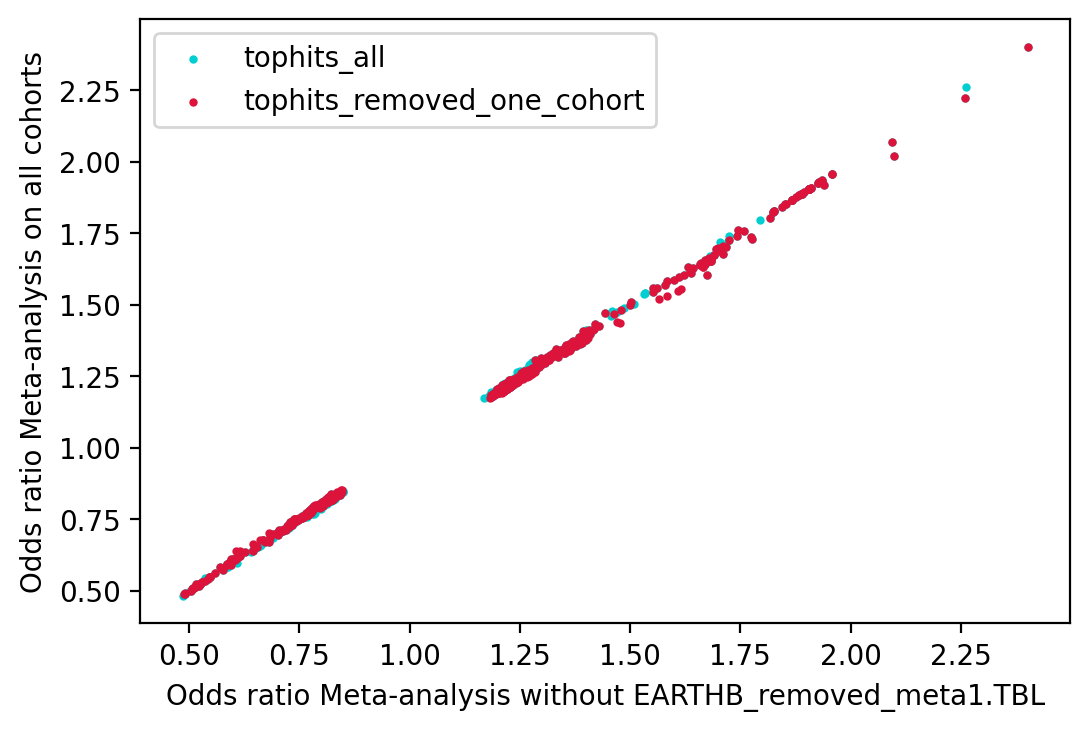

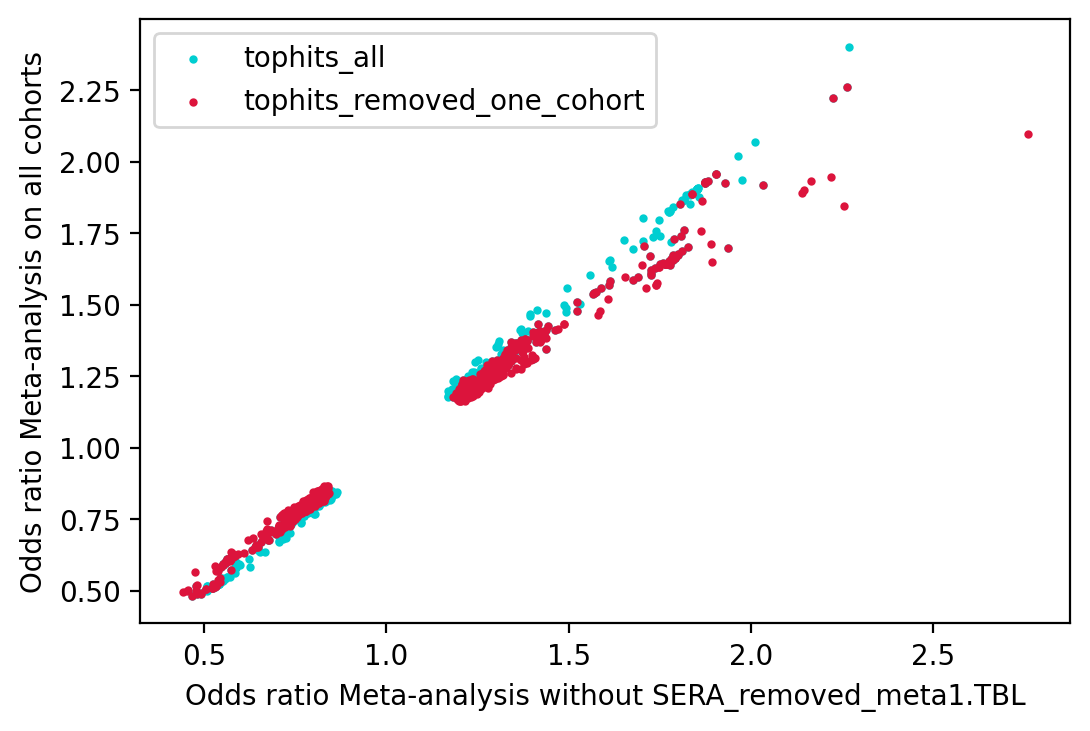

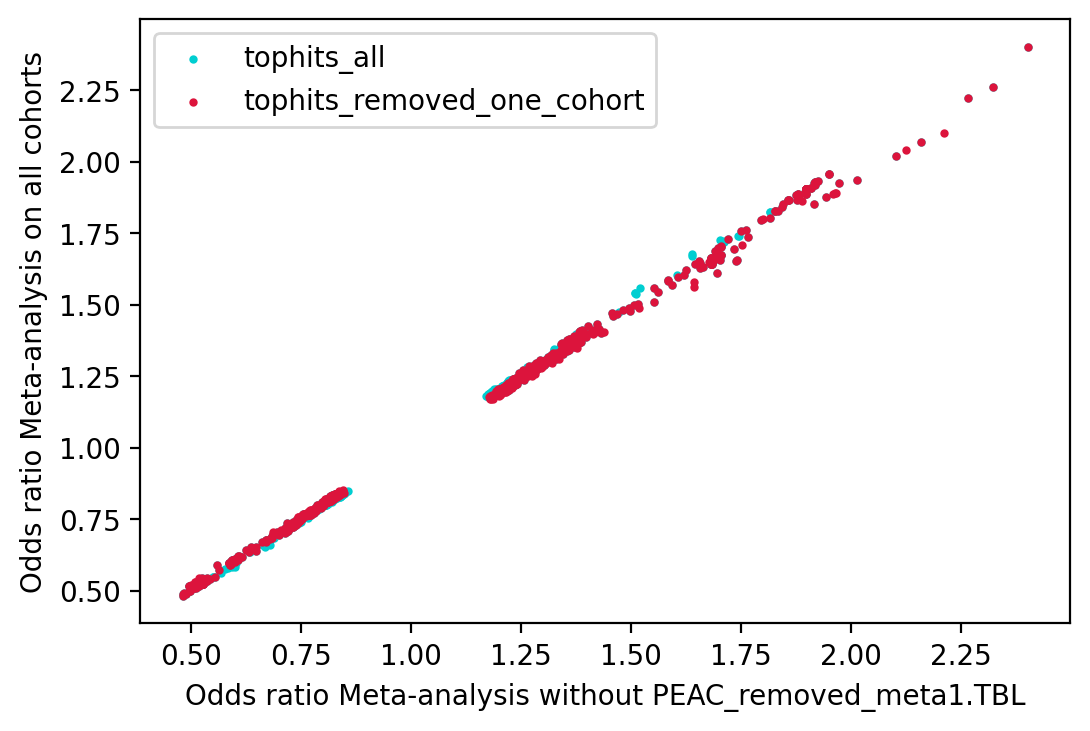

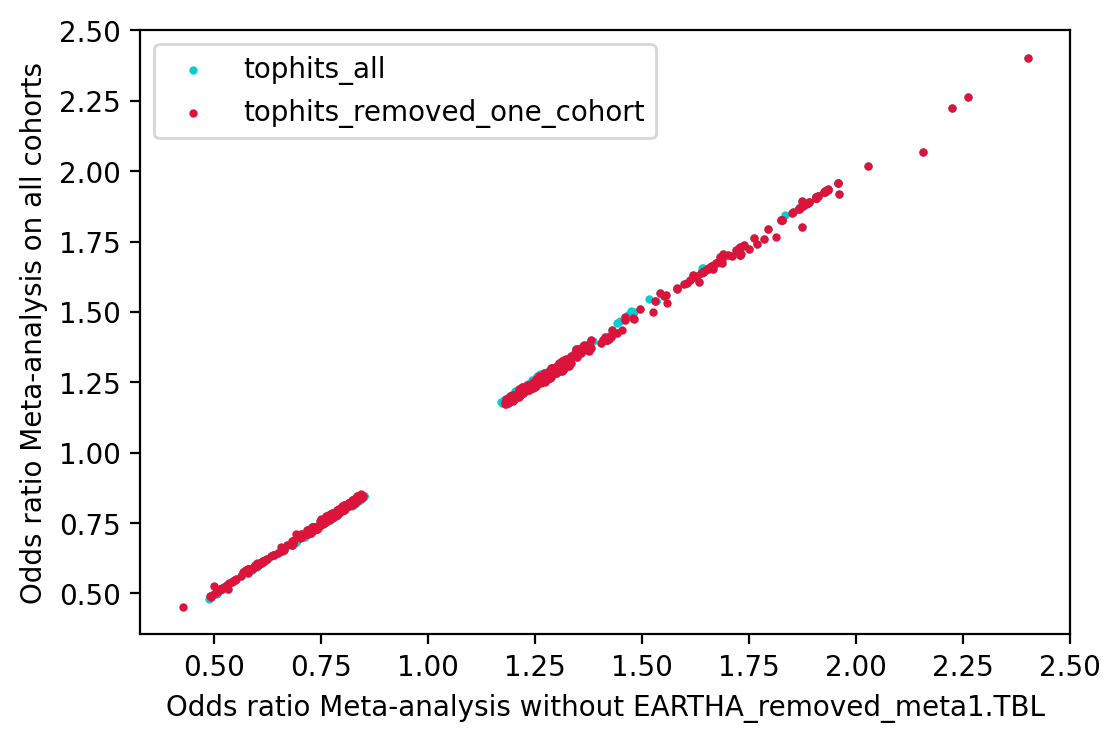

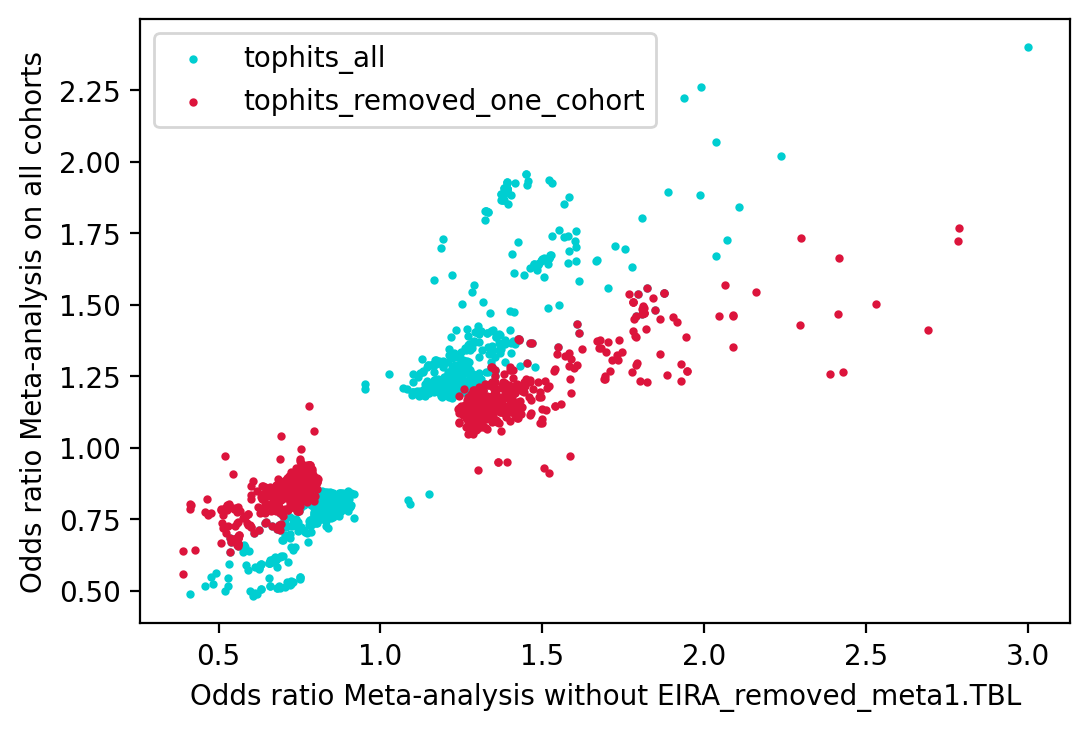

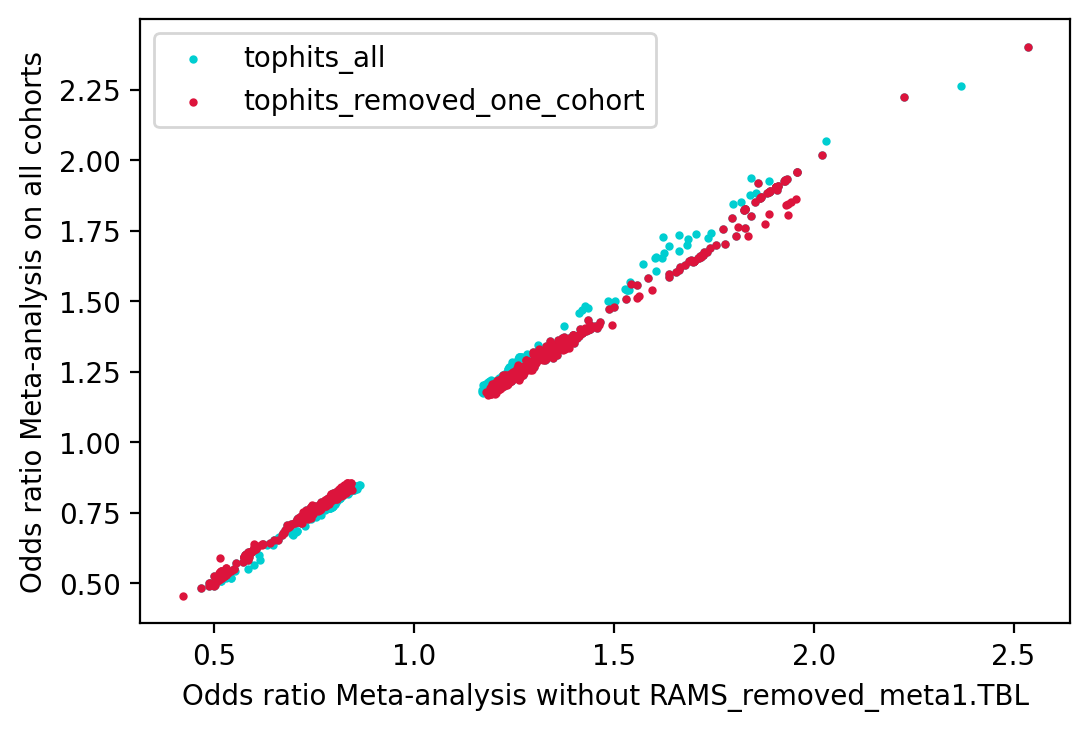

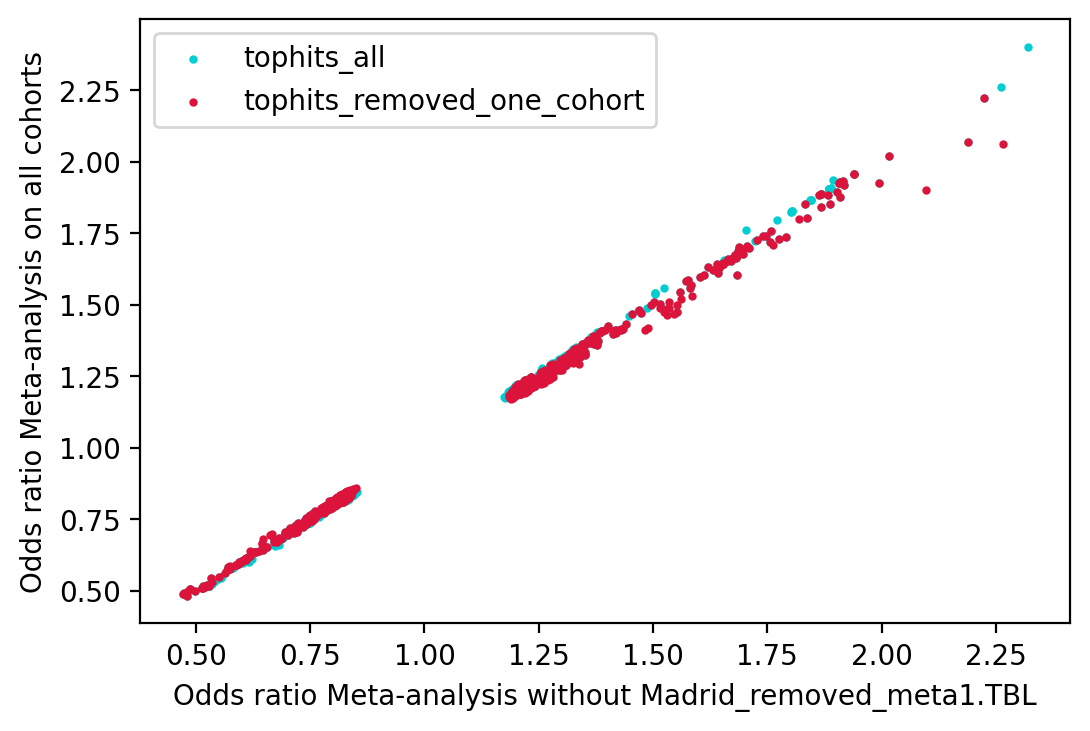

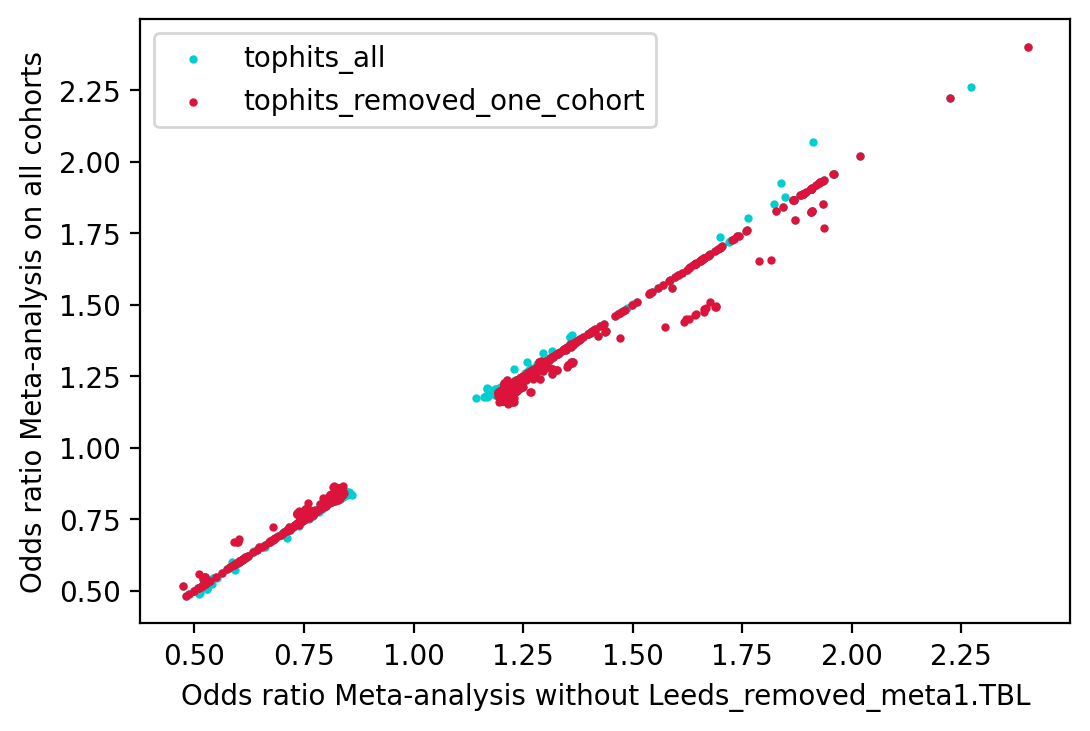

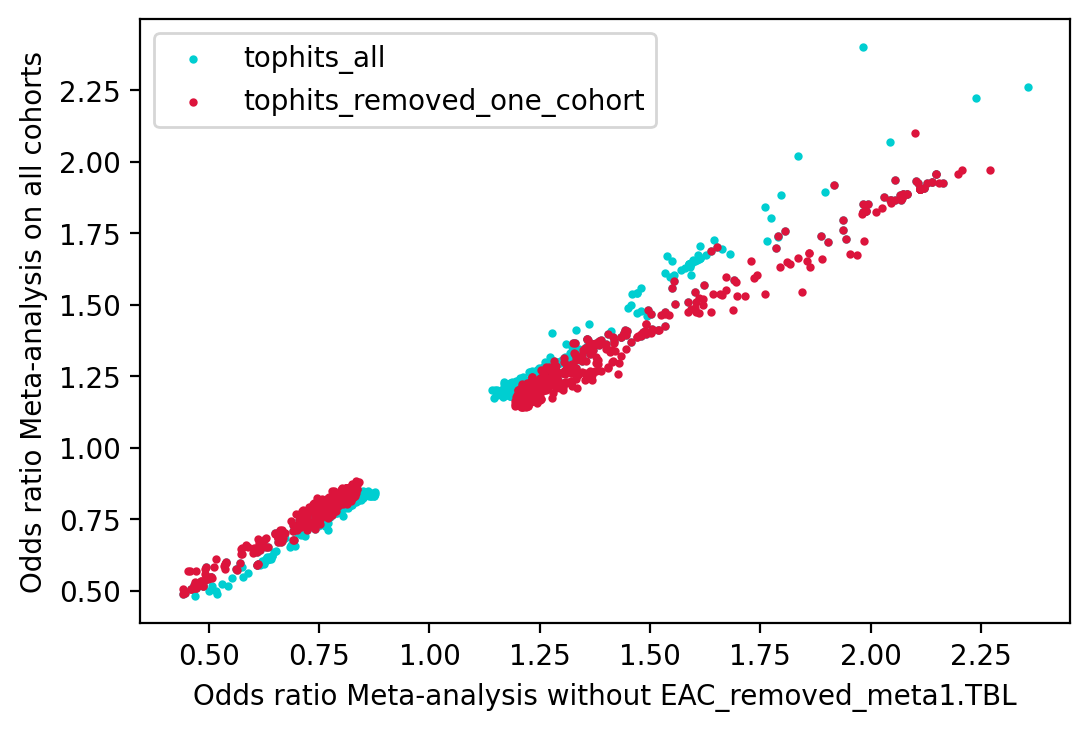

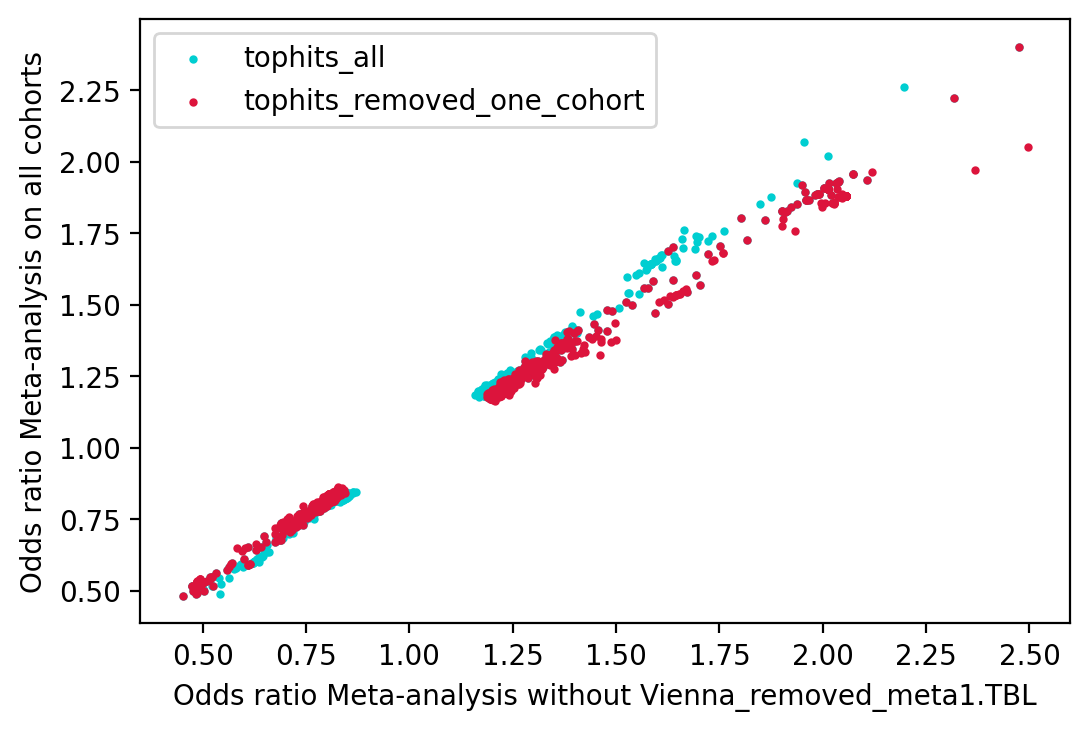

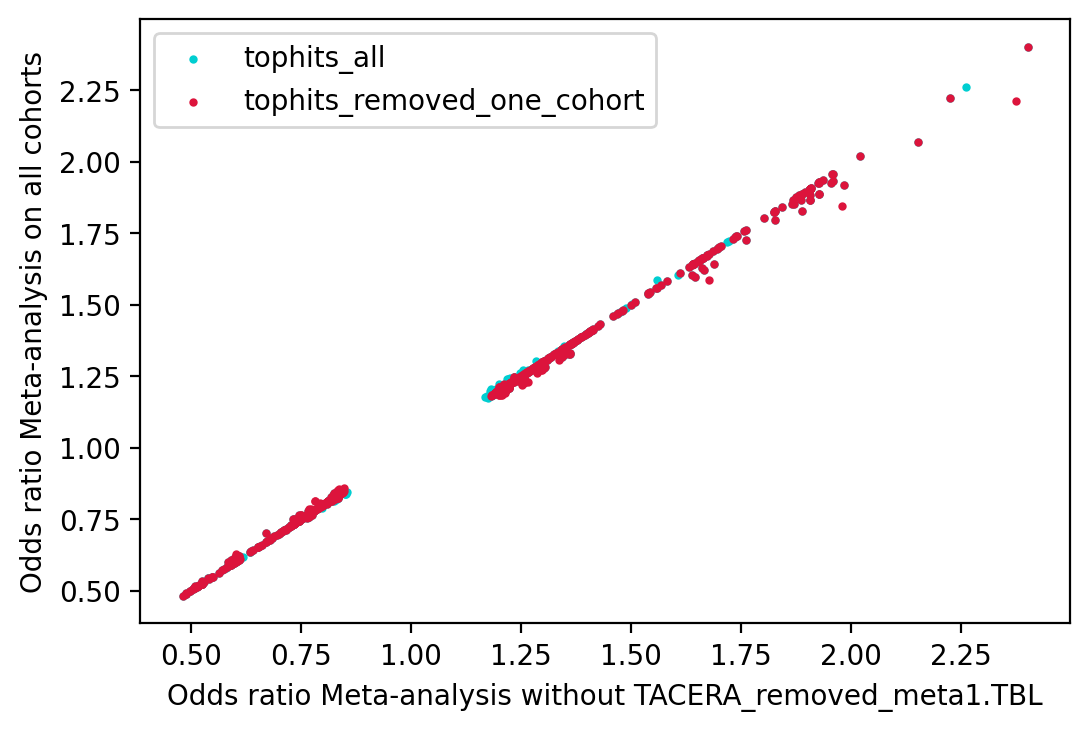

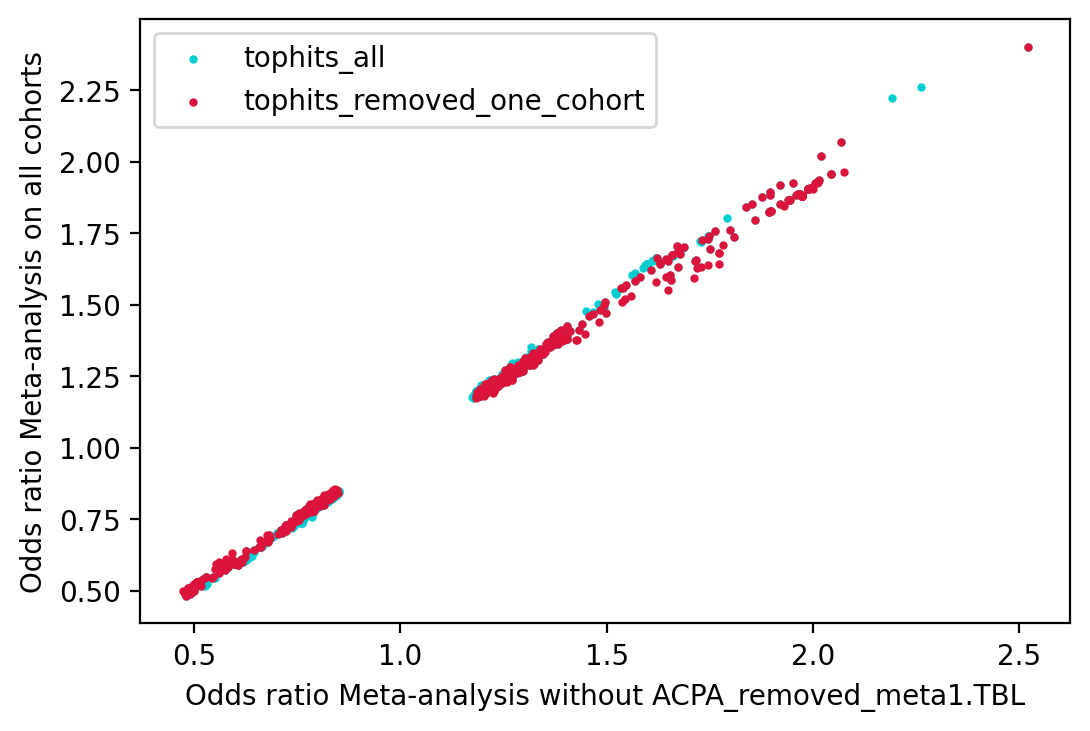

In [16]:
for i in range(len(summary_list)):
    summary_origin = pd.read_csv(summary_list[i],sep="\s+")
    cohort = os.path.basename(summary_list[i])
    OR = np.exp(summary_origin['Effect'])
    summary_origin.insert(6,'OR',OR)
    Merged = pd.merge(summary_origin,summary_all,left_on=['MarkerName'],right_on=['MarkerName'],how='inner',suffixes=("_removed_"+cohort,"_all"))
    tophits_removed = summary_origin.sort_values(['P-value'])[:1000]
    tophits_all = summary_all.sort_values(['P-value'])[:1000]
    tophits_removed = pd.merge(tophits_removed,Merged,how='left',on="MarkerName")
    tophits_all = pd.merge(tophits_all,Merged,how='left',on="MarkerName")
    #SCATTER PLOT Odds ratio
    plt.figure(dpi=200)
    plt.xlabel('Odds ratio Meta-analysis without '+cohort)
    plt.ylabel('Odds ratio Meta-analysis on all cohorts')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])
    colors1 = '#00CED1'
    colors2 = '#DC143C'
    temp = "OR_removed_"+cohort
    plt.scatter(tophits_all[temp],tophits_all['OR_all'],c=colors1,label='tophits_all',s=4)
    plt.scatter(tophits_removed[temp],tophits_removed['OR_all'],c=colors2,label='tophits_removed_one_cohort',s=4)
# plt.scatter(,c=colors2,label='Samantha\'s GWAS')
    plt.legend()
    plt.show()

In [8]:
#summary_origin = pd.read_csv("/exports/reum/CKe/RunMeta/stabilityTest/TACERA_removed_meta1.TBL",sep='\s+')
summary_all = pd.read_csv("/exports/reum/CKe/RunMeta/METALresult_filtered.TBL",sep='\s+')

In [9]:
summary_all

,MarkerName,BP,CHR,Allele1,Allele2,Effect,StdErr,P-value,Direction
0,5:29439275,29439275,5,t,c,-0.0083,0.0450,0.85280,---++-++--?-
1,5:85928892,85928892,5,t,c,-0.1423,0.0921,0.12260,----+---+-??
2,2:170966953,170966953,2,t,c,0.0183,0.2006,0.92740,-+?++?+?-+??
3,10:128341232,128341232,10,t,c,-0.0070,0.0455,0.87790,+-?--+----??
4,3:62707519,62707519,3,t,c,0.0930,0.0949,0.32700,+++--++---?+
...,...,...,...,...,...,...,...,...,...
6830697,3:80436770,80436770,3,a,g,0.2546,0.1113,0.02212,+++-++++-+??
6830698,18:44156714,44156714,18,c,g,-0.0485,0.0564,0.38930,++-+-----+?-
6830699,5:95076854,95076854,5,a,g,0.0594,0.0864,0.49170,+---+-+--+??
6830700,11:99622387,99622387,11,t,c,-0.0378,0.0585,0.51810,-++-+-+-++??


In [121]:
OR = np.exp(summary_origin['Effect'])
summary_origin.insert(6,'OR',OR)

In [10]:
OR = np.exp(summary_all['Effect'])
summary_all.insert(6,'OR',OR)

In [127]:
Merged = pd.merge(summary_origin,summary_all,left_on=['MarkerName'],right_on=['MarkerName'],how='inner',suffixes=("_removed_cohort","_all"))
Merged

,MarkerName,Allele1_removed_cohort,Allele2_removed_cohort,Effect_removed_cohort,StdErr_removed_cohort,P-value_removed_cohort,OR_removed_cohort,Direction_removed_cohort,BP,CHR,Allele1_all,Allele2_all,Effect_all,OR_all,StdErr_all,P-value_all,Direction_all
0,5:29439275,t,c,-0.0083,0.0450,0.85280,0.991734,---++-++---,29439275,5,t,c,-0.0083,0.991734,0.0450,0.85280,---++-++--?-
1,5:85928892,t,c,-0.1423,0.0921,0.12260,0.867361,----+---+-?,85928892,5,t,c,-0.1423,0.867361,0.0921,0.12260,----+---+-??
2,2:170966953,t,c,0.0183,0.2006,0.92740,1.018468,-+?++?+?-+?,170966953,2,t,c,0.0183,1.018468,0.2006,0.92740,-+?++?+?-+??
3,10:128341232,t,c,-0.0070,0.0455,0.87790,0.993024,+-?--+----?,128341232,10,t,c,-0.0070,0.993024,0.0455,0.87790,+-?--+----??
4,3:62707519,t,c,0.0930,0.0949,0.32700,1.097462,+++--++---+,62707519,3,t,c,0.0930,1.097462,0.0949,0.32700,+++--++---?+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6830697,3:80436770,a,g,0.2546,0.1113,0.02212,1.289946,+++-++++-+?,80436770,3,a,g,0.2546,1.289946,0.1113,0.02212,+++-++++-+??
6830698,18:44156714,c,g,-0.0485,0.0564,0.38930,0.952657,++-+-----+-,44156714,18,c,g,-0.0485,0.952657,0.0564,0.38930,++-+-----+?-
6830699,5:95076854,a,g,0.0594,0.0864,0.49170,1.061200,+---+-+--+?,95076854,5,a,g,0.0594,1.061200,0.0864,0.49170,+---+-+--+??
6830700,11:99622387,t,c,-0.0378,0.0585,0.51810,0.962906,-++-+-+-++?,99622387,11,t,c,-0.0378,0.962906,0.0585,0.51810,-++-+-+-++??


In [135]:
tophits_removed = summary_origin.sort_values(['P-value'])[:1000]
tophits_all = summary_all.sort_values(['P-value'])[:1000]

In [136]:
tophits_removed = pd.merge(tophits_removed,Merged,how='left',on="MarkerName")
tophits_all = pd.merge(tophits_all,Merged,how='left',on="MarkerName")

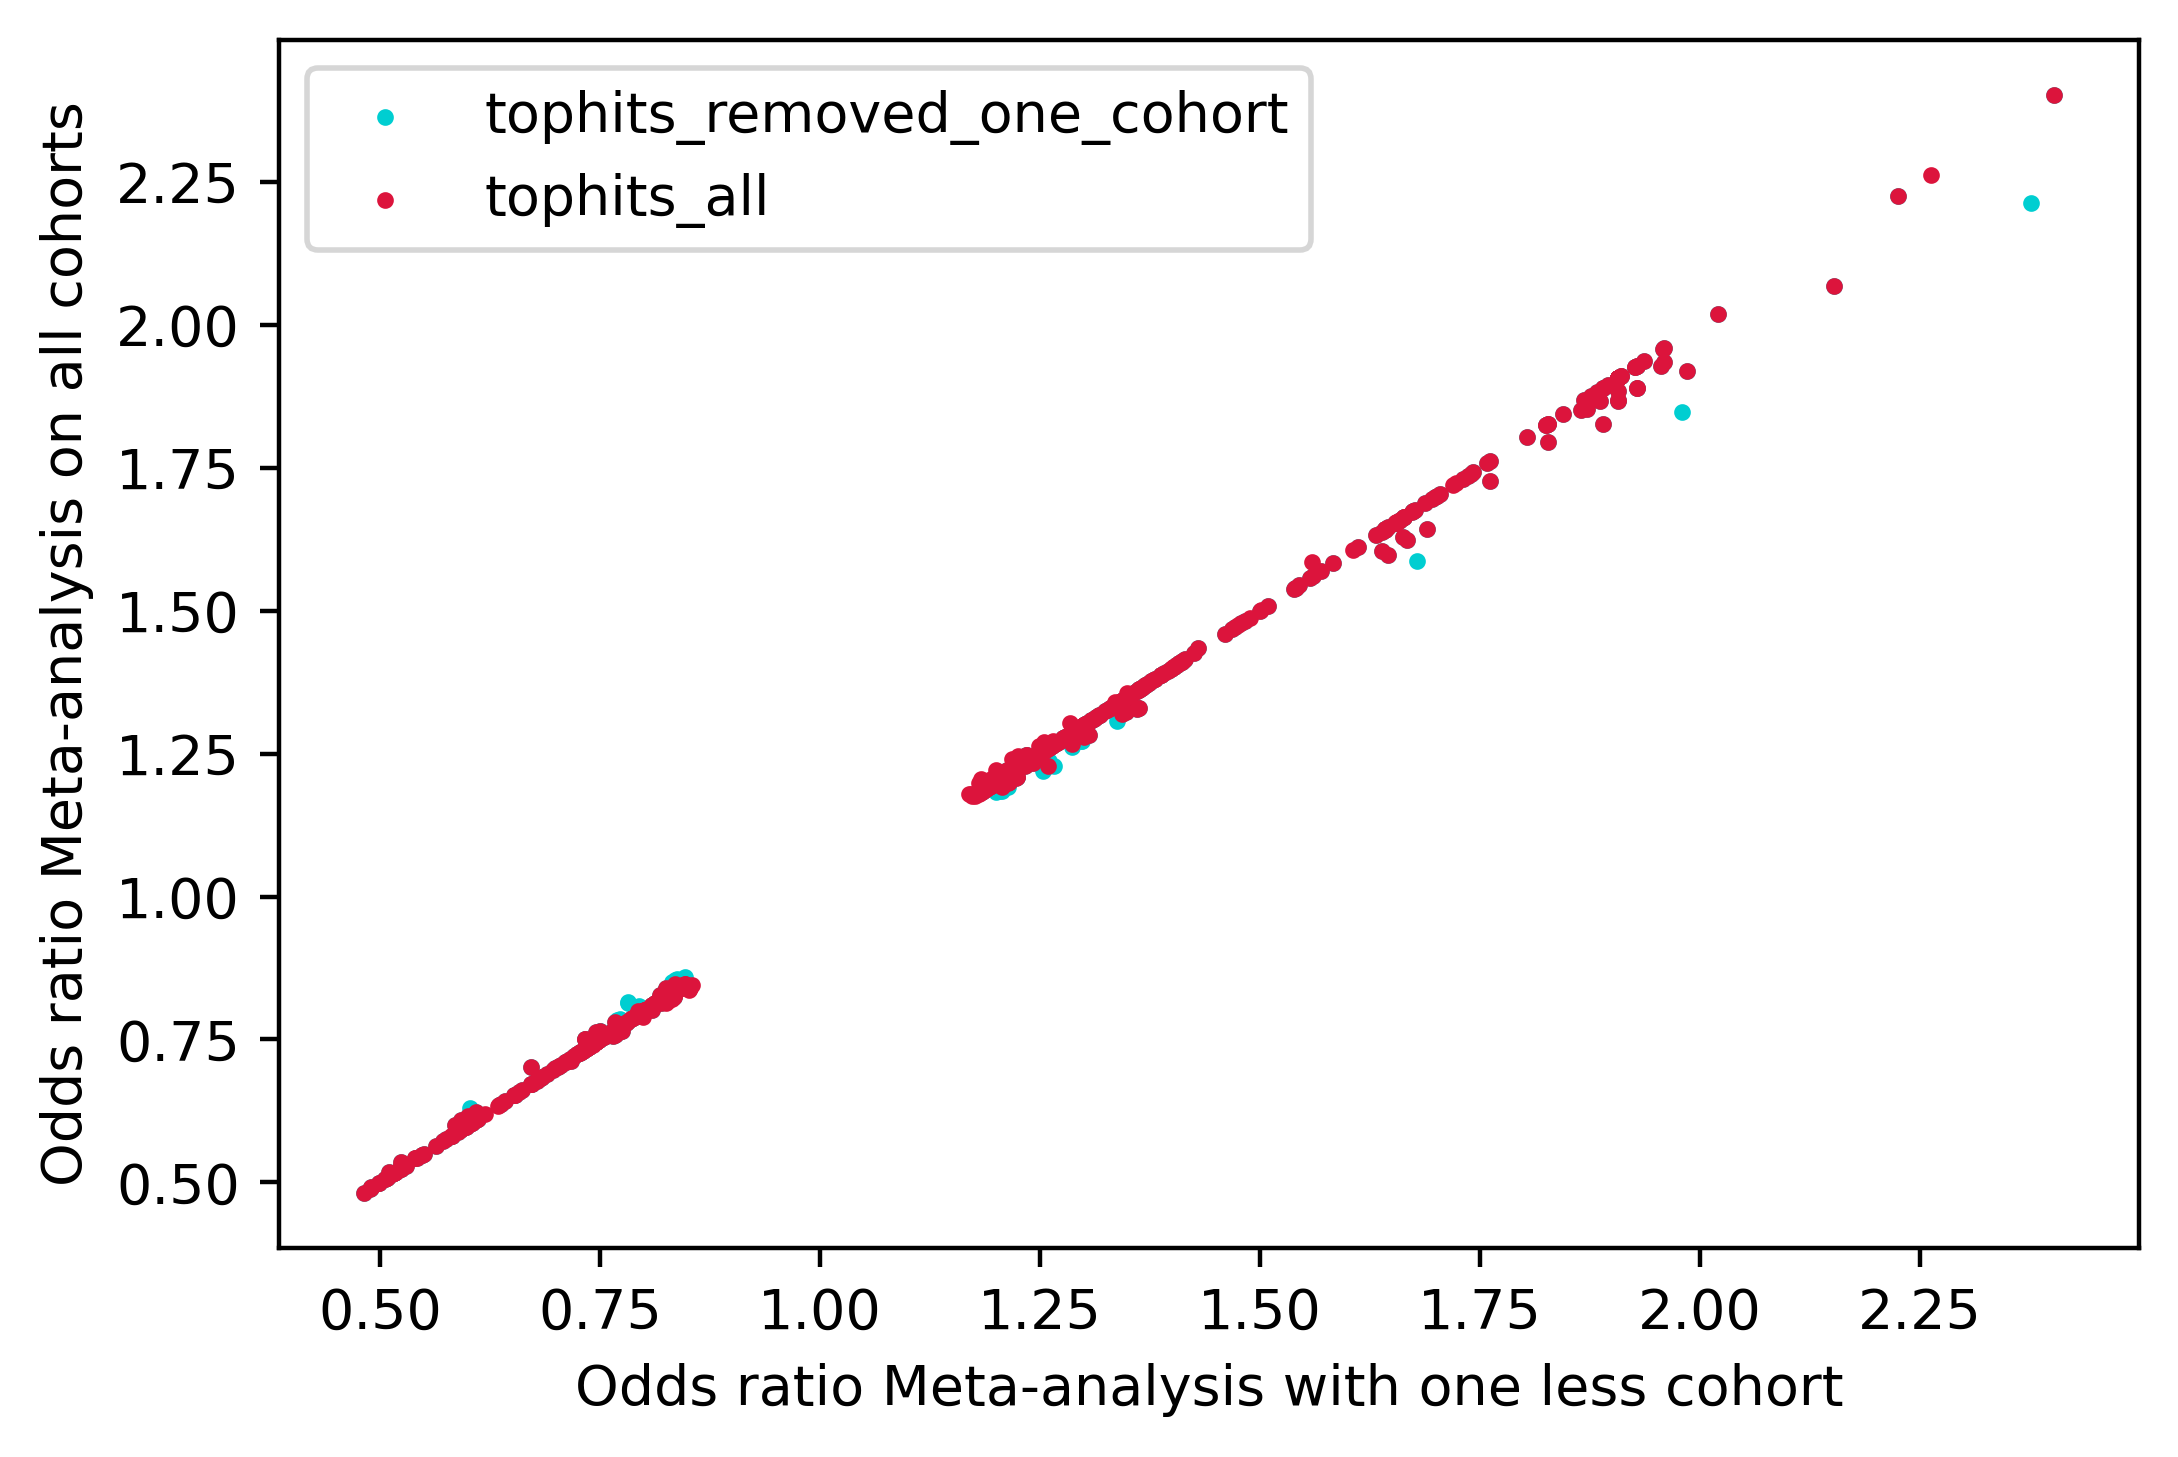

In [137]:
#SCATTER PLOT Odds ratio
plt.figure(dpi=400)
plt.xlabel('Odds ratio Meta-analysis with one less cohort')
plt.ylabel('Odds ratio Meta-analysis on all cohorts')
# plt.xlim(xmax=10,xmin=0)
# plt.ylim(ymax=10,ymin=0)
#plt.xticks([])
#plt.yticks([])

colors1 = '#00CED1'
colors2 = '#DC143C'

plt.scatter(tophits_removed['OR_removed_cohort'],tophits_removed['OR_all'],c=colors1,label='tophits_removed_one_cohort',s=4)
plt.scatter(tophits_all['OR_removed_cohort'],tophits_all['OR_all'],c=colors2,label='tophits_all',s=4)
# plt.scatter(,c=colors2,label='Samantha\'s GWAS')

plt.legend()
plt.show()
#Low stability